\begin{equation}
\partial_t u + 6 u \partial_x u + \partial_{xxx}u =  0
\end{equation}

In [28]:
import numpy as np
from matplotlib import pylab as plt

In [50]:
sech = lambda x : np.cosh(x)**-1
csch = lambda x : np.sinh(x)**-1

In [68]:
def make_soliton(beta):
    def u(x,t):
        return 0.5*beta*sech(0.5*np.sqrt(beta)*(x-beta*t))**2
    return u
def make_left_soliton(beta):
    def u(x,t):
        return - 0.5*beta*csch(0.5*np.sqrt(beta)*(x-beta*t))**2.0
    return u
def double_soliton(x,t):
    return - 12.0*(
        3.0 + 4.0*np.cosh(2.0*x-8.0*t) + np.cosh(4.0*x-64.0*t)
    ) / (
        3.0*np.cosh(x-28.0*t) + np.cosh(3.0*x-36*t)
    )**2

In [63]:
import detest

In [74]:
xs = np.linspace(-5,5,41)
ts = np.linspace(0,5,20)
grid = np.meshgrid(xs,ts)

In [75]:
SOLS = [
    make_soliton(0.01),
    make_soliton(0.1),
    make_soliton(1.0),
    make_soliton(10.0),
    make_soliton(100.0),
    make_left_soliton(0.01),
    make_left_soliton(0.1),
    make_left_soliton(1.0),
    make_left_soliton(10.0),
    make_left_soliton(100.0),
    double_soliton
]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in cosh
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  


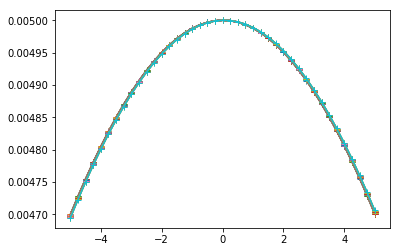

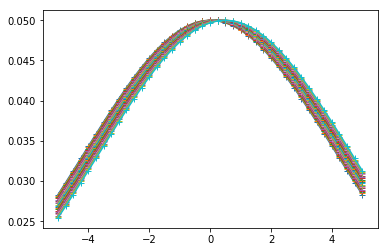

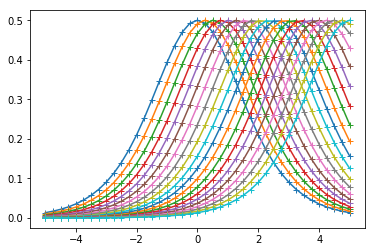

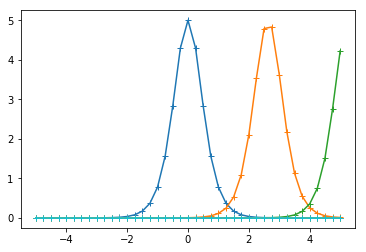

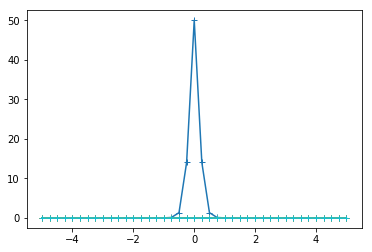

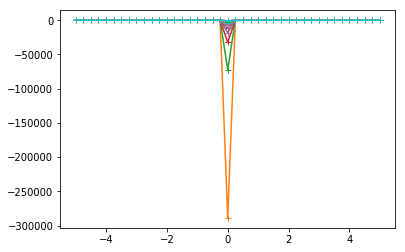

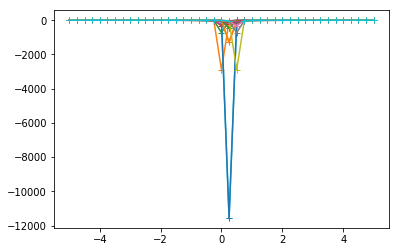

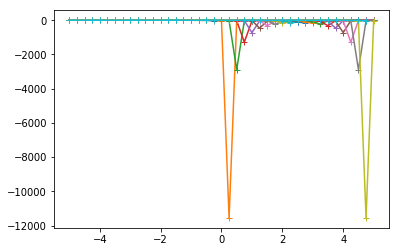

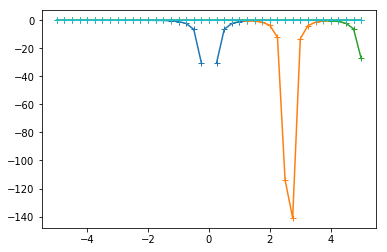

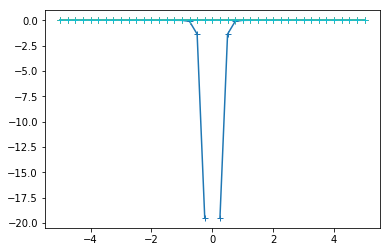

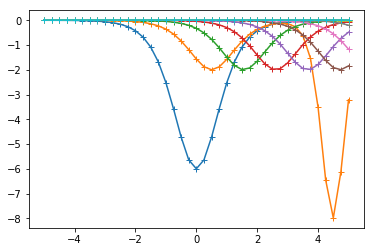

In [76]:
US = []
for S in SOLS:
    u = S(grid[0],grid[1])
    plt.figure()
    for i,t in enumerate(ts):
        plt.plot(xs,u[i,:],'-+')
    US.append(u)